# A Numerical Examination of Gender and Racial Discrepancies in the Start Program

## V Quidore, Raniyan Zaman, Josephine Kim, and Kai Zhou

In [1]:
import pandas as pd
import numpy as np
import os
import plotnine
from plotnine import *
import matplotlib.pyplot as plt

## Read in CSVs and Excel files 

In [2]:
FEIS_df = pd.read_excel(r"../files/START_FEIS_Data.xlsx")
Dartmouth_Data_df = pd.read_excel(r"../files/Dartmouth_Data_Set.xlsx")

male_white_df = pd.read_csv("../output/male_white")
male_poc_df = pd.read_csv("../output/male_nonwhite")
female_poc_df = pd.read_csv("../output/female_nonwhite")
female_white_df = pd.read_csv("../output/female_white")
male_white_df.head()

,Local ID,Region,Date Enrolled in START,Gender,Race,Date of birth,Ethnicity,Level of Intellectual Disability,Psychiatric diagnoses,Medical diagnoses,...,"In\nthe past year, did your family member use in-patient psychiatric services?","If\nyes, were the inpatient services that your family member received helpful to\nhim/her in your opinion? ?",How\nmuch help was available to you at night or on weekends if your family member\nhad a crisis?,Are\nthere options outside of the hospital for individuals experiencing a crisis to\ngo for help (i.e. crisis/hospital diversion beds)?,Who\nwas the primary source of information about your family memberâ€™s mental health\nservices?,"If other, please describe..2","During the past year, how much involvement\ndid you want to have in your family memberâ€™s treatment plan?",Was there any particular service that your\nfamily member needed that was not available?,"If yes, please describe the service.",What\nadvice would you give to service planners regarding the mental health service\nneeds of persons with IDD and their families?
0,6580618,California : CA START San Andreas,2020-12-23 00:00:00,Male,White,2004-12-21 00:00:00,Not of Hispanic origin,Moderate,NaN,NaN,...,No,NaN,Very little,None at all,Other,school based service providers,A lot,Yes,"""After Trevorâ€™s psychiatrist left the office...",Declined to answer/did not know.
1,476148W,North Carolina : Central,2020-12-17 00:00:00,Male,White,2008-07-17 00:00:00,Not of Hispanic origin,Mild,"Attention-Deficit/Hyperactivity Disorder, Auti...",NaN,...,Yes,None at all,None at all,All that was wanted/needed,His/her service facilitator,NaN,A lot,No,NaN,Ensure that individuals are getting the adequa...
2,11157543,New Hampshire : Region 4 - Community Bridges,2020-12-15 00:00:00,Male,White,1991-11-27 00:00:00,Not of Hispanic origin,Mild,Attention-Deficit/Hyperactivity Disorder (2001...,NaN,...,No,Did not know/answer,Very little,None at all,No one,NaN,Some,Yes,NaN,NaN
3,453394,New York : Region 1,2020-12-07 00:00:00,Male,White,2010-08-31 00:00:00,Not of Hispanic origin,Mild,"Attention-Deficit/Hyperactivity Disorder, Auti...",NaN,...,Yes,Very little,Very little,None at all,Other,NaN,A lot,Yes,"Any services, he has not gotten any in two yea...",really putting themselves in parents shoes and...
4,408407,New York : Region 1,2020-12-07 00:00:00,Male,White,2003-04-18 00:00:00,"Unknown, not collected",None noted,"Attention-Deficit/Hyperactivity Disorder, Auti...",Neurologic,...,No,"Some, but not as much as was needed/wanted",Very little,Very little,Your family member him/herself,NaN,Some,Yes,Behavioral Coaching,NaN


## FUNCTIONS

In [3]:
## rename the columns function
def ren_cols(df, old_name, new_name):
    return df.rename(columns={old_name: new_name}, inplace=True)


In [4]:
## rename all columns to be renamed in list of dataframes
def ren_all_cols(df_list):
    for df in df_list:
        ren_cols(df, 
        "During the past year, in general how\nsatisfied were you with the outpatient mental health services your family\nmember received?", 
       "gen_satis_outpatient_mh_serv")

        ren_cols(df, 
        "In\nthe past year, did your family member use in-patient psychiatric services?", 
       "in-pat_psych_used")

        ren_cols(df, 
        "During\nthe past year, how convenient was it for your family member to use mental\nhealth services (i.e. were services easy to access)?",
        "access_of_mh_services")

        ren_cols(df, 
        "How\nmuch help was available to you at night or on weekends if your family member\nhad a crisis?", 
        "wknd_avail_cris")

        ren_cols(df, 
         "Are\nthere options outside of the hospital for individuals experiencing a crisis to\ngo for help (i.e. crisis/hospital diversion beds)?",
         "non_hosp_cris_care_opts")

        ren_cols(df, 
         "Was there any particular service that your\nfamily member needed that was not available?", 
         "was_unavail_service")
        

In [5]:
# race gender criteria function

def race_gender_crit(is_white_col, is_male_col):
    
    if is_white_col==True and is_male_col==True:
        val = "White_Male"
    elif is_white_col==False and is_male_col==True:
        val = "Nonwhite_Male"
    elif is_white_col==False and is_male_col==False:
        val = "Nonwhite_Female"
    elif is_white_col==True and is_male_col==False:
        val = "White_Female"
    else:
        val = float("NaN")
    return val

In [6]:
## generate outpatient pie chart (generic, input specific racial and gender designations, dataframes, and filepaths)

def pie_chart_gen_sat(df, race_gender, filepath):
    ren_cols(df, "During the past year, in general how\nsatisfied were you with the outpatient mental health services your family\nmember received?", 
       "gen_satis_outpatient_mh_serv")
    gen_sat = df.groupby("gen_satis_outpatient_mh_serv")["Local ID"].agg("nunique").reset_index()
    gen_sat["percentage"] = (gen_sat['Local ID'] / gen_sat['Local ID'].sum()) * 100 
    gen_sat["percentage"] = gen_sat.percentage.round(1)
    gen_sat.percentage.plot(kind='pie', 
                           title="General Levels of Satisfaction Regarding \nOutpatient Mental Health Services \nfrom Families of " + 
                            race_gender + " Patients", 
                          ylabel="", labels=wm_gen_sat["gen_satis_outpatient_mh_serv"], 
                           autopct='%1.1f%%')
    plt.tight_layout()
    plt.figure()
    return plt.savefig(filepath)

In [7]:
## create dataframe of proportions of satisfaction level given a dataframe and 
## string name of its corresponding demographic

def gen_satis_outp_df_constr(df, demo):
    ren_cols(df, "During the past year, in general how\nsatisfied were you with the outpatient mental health services your family\nmember received?", 
       "gen_satis_outpatient_mh_serv")
    gen_sat = df.groupby("gen_satis_outpatient_mh_serv")["Local ID"].agg("nunique").reset_index()
    gen_sat["percentage"] = (gen_sat['Local ID'] / gen_sat['Local ID'].sum()) * 100 
    gen_sat["percentage"] = gen_sat.percentage.round(1)
    gen_sat["demographic"] = demo
    return gen_sat
    

In [8]:
## create a bar chart for the the likert responses of any given demographic of patients 

def likert_df_constr(df, metric, demo):
    likert_df = df.groupby(metric)["Local ID"].agg("nunique").reset_index()
    likert_df["percentage"] = (likert_df["Local ID"] / likert_df["Local ID"].sum()) * 100
    likert_df["percentage"] = likert_df.percentage.round(1)
    likert_df["demographic"] = demo
    return likert_df


In [9]:
## concatenate likert dataframes based on demographics 

def concat_likert_by_demo(demo_df_list):
    return pd.concat(demo_df_list)
    

In [10]:
## create and return a simple bar charts based off of metrics with binary indicators

def create_simple_barch(df, ch_title, metric, ch_color, filepath):
    
    proportion = df.groupby("Race_Gender")[metric].agg(np.mean).reset_index()
    proportion.plot(kind='bar', title=ch_title)
    plt.bar(proportion["Race_Gender"], proportion[metric], color=ch_color)
    plt.xlabel("Race and Gender of Patient")
    plt.ylabel("Percentage")
    plt.xticks(proportion["Race_Gender"], labels = proportion["Race_Gender"], rotation=10)
    # code from https://www.adamsmith.haus/python/answers/how-to-remove-the-frame-from-a-matplotlib-legend-in-python 
    plt.legend([], frameon=False)
    plt.tight_layout()

    plt.savefig(filepath)
    
    return plt.show()
    

In [11]:
## create dodged bar charts based off of metrics with likert scale measurements
## unfortunately, this functin did not work

def create_dodged_barch(df_list, ch_title, metric_list, color_list, num_grps, wid):
    
    N = num_grps
    rang = np.arange(N)
    width = wid
    
    for i in range(len(metric_list)):
        plt.bar((rang + (width*int(i/2))), df_list[i]["percentage"], color = color_list[i],
                width = width, edgecolor = 'black',
                label=metric_list[i])
        print("bar")
        
    plt.xlabel("Race and Gender")
    plt.ylabel("Percentage")
    plt.title(ch_title)
  
    plt.xticks(rang + width/(rang - 1), df_list[0]["demographic"], rotation=15)
        
    # code from https://www.statology.org/matplotlib-legend-position/
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.figure(figsize=(6, 4))
    plt.tight_layout()

    plt.savefig("../output/tot-gen-s-chart")
    return plt.show()
    

## Create larger dataframe containing patients of all racial and gender designations by concatenating four subsets

In [12]:
# stack the dataframes on top of each other

all_race_gender = pd.concat([male_white_df, male_poc_df, female_poc_df, female_white_df])
all_race_gender["Race"].value_counts()
all_race_gender["Gender"].value_counts()

all_race_gender["is_white"] = all_race_gender["Race"] == "White"
all_race_gender["is_male"] = all_race_gender["Gender"] == "Male"

# create column for both race and gender
all_race_gender["Race_Gender"] = all_race_gender.apply(lambda x: race_gender_crit(x["is_white"], x["is_male"]), axis=1)

all_race_gender

,Local ID,Region,Date Enrolled in START,Gender,Race,Date of birth,Ethnicity,Level of Intellectual Disability,Psychiatric diagnoses,Medical diagnoses,...,Are\nthere options outside of the hospital for individuals experiencing a crisis to\ngo for help (i.e. crisis/hospital diversion beds)?,Who\nwas the primary source of information about your family memberâ€™s mental health\nservices?,"If other, please describe..2","During the past year, how much involvement\ndid you want to have in your family memberâ€™s treatment plan?",Was there any particular service that your\nfamily member needed that was not available?,"If yes, please describe the service.",What\nadvice would you give to service planners regarding the mental health service\nneeds of persons with IDD and their families?,is_white,is_male,Race_Gender
0,6580618,California : CA START San Andreas,2020-12-23 00:00:00,Male,White,2004-12-21 00:00:00,Not of Hispanic origin,Moderate,NaN,NaN,...,None at all,Other,school based service providers,A lot,Yes,"""After Trevorâ€™s psychiatrist left the office...",Declined to answer/did not know.,True,True,White_Male
1,476148W,North Carolina : Central,2020-12-17 00:00:00,Male,White,2008-07-17 00:00:00,Not of Hispanic origin,Mild,"Attention-Deficit/Hyperactivity Disorder, Auti...",NaN,...,All that was wanted/needed,His/her service facilitator,NaN,A lot,No,NaN,Ensure that individuals are getting the adequa...,True,True,White_Male
2,11157543,New Hampshire : Region 4 - Community Bridges,2020-12-15 00:00:00,Male,White,1991-11-27 00:00:00,Not of Hispanic origin,Mild,Attention-Deficit/Hyperactivity Disorder (2001...,NaN,...,None at all,No one,NaN,Some,Yes,NaN,NaN,True,True,White_Male
3,453394,New York : Region 1,2020-12-07 00:00:00,Male,White,2010-08-31 00:00:00,Not of Hispanic origin,Mild,"Attention-Deficit/Hyperactivity Disorder, Auti...",NaN,...,None at all,Other,NaN,A lot,Yes,"Any services, he has not gotten any in two yea...",really putting themselves in parents shoes and...,True,True,White_Male
4,408407,New York : Region 1,2020-12-07 00:00:00,Male,White,2003-04-18 00:00:00,"Unknown, not collected",None noted,"Attention-Deficit/Hyperactivity Disorder, Auti...",Neurologic,...,Very little,Your family member him/herself,NaN,Some,Yes,Behavioral Coaching,NaN,True,True,White_Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,111943,Texas : El Paso County,2014-09-22 00:00:00,Female,White,1986-02-12 00:00:00,Hispanic - specific origin not specified,Moderate,Attention-Deficit/Hyperactivity Disorder (1999...,"Dermatology/Skin (2014), Ear/Nose/Throat (2014...",...,Very little,His/her service facilitator,NaN,A lot,No,NaN,NaN,True,False,White_Female
174,704085W,North Carolina : West,2014-08-01 00:00:00,Female,White,1983-03-01 00:00:00,Not of Hispanic origin,Mild,"Autism Spectrum Disorder (2014), Depressive Di...",Neurologic (2014),...,None at all,Other,"therapist, psychiatrist, service coordinator a...",A lot,Yes,"If yes, describe the service: American Sign La...",People with IDD/MH behavioral dysregulation be...,True,False,White_Female
175,13874,Texas : Tarrant County,2014-06-10 00:00:00,Female,White,1992-07-01 00:00:00,Not of Hispanic origin,Mild,"Bipolar and Related Disorders, Posttraumatic S...",Endocrine,...,All that was wanted/needed,His/her service facilitator,NaN,Some,Yes,Trauma therapy,NaN,True,False,White_Female
176,1100502,Texas : Tarrant County,2014-05-09 00:00:00,Female,White,2004-06-01 00:00:00,Not of Hispanic origin,Mild,"Attention-Deficit/Hyperactivity Disorder, Bipo...",NaN,...,All that was wanted/needed,His/her service facilitator,NaN,Some,No,NaN,NaN,True,False,White_Female


## Rename columns to be investigated for simplicity

In [13]:
## use ren_all_cols function to rename each of the columns

ren_all_cols([all_race_gender, male_white_df, female_white_df, male_poc_df, female_poc_df])

all_race_gender.columns
female_poc_df.columns

Index(['Local ID', 'Region', 'Date Enrolled in START', 'Gender', 'Race',
       'Date of birth', 'Ethnicity', 'Level of Intellectual Disability',
       'Psychiatric diagnoses', 'Medical diagnoses', 'Other Disabilities',
       'Funding', 'Respondent ID #  (SIRS Local ID)', 'Start Date', 'End Date',
       'What services does your family member currently receive?  Check all that apply',
       'If other, please describe.',
       'Where does your family member receive mental health services?',
       'If other, please describe', 'Your relationship',
       'If other, please describe.1',
       'Does (name of individual) continue to live with you?',
       'If no, where does he/she live now?',
       'In the past year, how difficult has it been caring for your family member?',
       'What\nis the total number of people, including yourself, presently living in your\nhousehold?  Please indicate everyone who\nlives with you at least half of the time - Parents/Step-parents',
       'What\n

In [14]:
## check value counts

all_race_gender.access_of_mh_services.value_counts()

Somewhat easy to access         244
Difficult to access             240
Somewhat difficult to access    237
Easy to access                  226
Could not access                103
Did not know/answer              29
Name: access_of_mh_services, dtype: int64

In [15]:
# create binary indicators for overall dataframe
all_race_gender["unavail_serv"] = all_race_gender["was_unavail_service"] == "Yes"
all_race_gender["was_in-pat_psych_serv_used"] = all_race_gender["in-pat_psych_used"] == "Yes" 

all_race_gender.head()



,Local ID,Region,Date Enrolled in START,Gender,Race,Date of birth,Ethnicity,Level of Intellectual Disability,Psychiatric diagnoses,Medical diagnoses,...,"If other, please describe..2","During the past year, how much involvement\ndid you want to have in your family memberâ€™s treatment plan?",was_unavail_service,"If yes, please describe the service.",What\nadvice would you give to service planners regarding the mental health service\nneeds of persons with IDD and their families?,is_white,is_male,Race_Gender,unavail_serv,was_in-pat_psych_serv_used
0,6580618,California : CA START San Andreas,2020-12-23 00:00:00,Male,White,2004-12-21 00:00:00,Not of Hispanic origin,Moderate,NaN,NaN,...,school based service providers,A lot,Yes,"""After Trevorâ€™s psychiatrist left the office...",Declined to answer/did not know.,True,True,White_Male,True,False
1,476148W,North Carolina : Central,2020-12-17 00:00:00,Male,White,2008-07-17 00:00:00,Not of Hispanic origin,Mild,"Attention-Deficit/Hyperactivity Disorder, Auti...",NaN,...,NaN,A lot,No,NaN,Ensure that individuals are getting the adequa...,True,True,White_Male,False,True
2,11157543,New Hampshire : Region 4 - Community Bridges,2020-12-15 00:00:00,Male,White,1991-11-27 00:00:00,Not of Hispanic origin,Mild,Attention-Deficit/Hyperactivity Disorder (2001...,NaN,...,NaN,Some,Yes,NaN,NaN,True,True,White_Male,True,False
3,453394,New York : Region 1,2020-12-07 00:00:00,Male,White,2010-08-31 00:00:00,Not of Hispanic origin,Mild,"Attention-Deficit/Hyperactivity Disorder, Auti...",NaN,...,NaN,A lot,Yes,"Any services, he has not gotten any in two yea...",really putting themselves in parents shoes and...,True,True,White_Male,True,True
4,408407,New York : Region 1,2020-12-07 00:00:00,Male,White,2003-04-18 00:00:00,"Unknown, not collected",None noted,"Attention-Deficit/Hyperactivity Disorder, Auti...",Neurologic,...,NaN,Some,Yes,Behavioral Coaching,NaN,True,True,White_Male,True,False


In [16]:
## subset the larger dataframe by designated gender; this will be used to analyze discrepancies by binary indicators

male_df = all_race_gender[all_race_gender['is_male'] == True]
male_df
female_df = all_race_gender[all_race_gender['is_male'] == False]
female_df

,Local ID,Region,Date Enrolled in START,Gender,Race,Date of birth,Ethnicity,Level of Intellectual Disability,Psychiatric diagnoses,Medical diagnoses,...,"If other, please describe..2","During the past year, how much involvement\ndid you want to have in your family memberâ€™s treatment plan?",was_unavail_service,"If yes, please describe the service.",What\nadvice would you give to service planners regarding the mental health service\nneeds of persons with IDD and their families?,is_white,is_male,Race_Gender,unavail_serv,was_in-pat_psych_serv_used
0,6570649,California : CA START San Andreas,2020-12-29 00:00:00,Female,"Unknown, not collected",1999-02-07 00:00:00,Hispanic - specific origin not specified,Severe,"Generalized Anxiety Disorder, Schizophrenia","Hematology/Oncology, Other: Digeorge syndrome",...,Santa Cruz County Psychiatrist,A lot,Yes,A counselor was not and has not been made avai...,â€œPlease be aware of her conditions and diagn...,False,False,Nonwhite_Female,True,True
1,443817,New York : Region 4 Richmond Kings - Brooklyn,2020-11-18 00:00:00,Female,Black or African American,1998-10-27 00:00:00,Not of Hispanic origin,Mild,"Attention-Deficit/Hyperactivity Disorder, Gene...",Obesity,...,NaN,A lot,No,NaN,NaN,False,False,Nonwhite_Female,False,True
2,409599W,North Carolina : West,2020-11-05 00:00:00,Female,Black or African American,1999-06-18 00:00:00,Not of Hispanic origin,Moderate,"Attention-Deficit/Hyperactivity Disorder, Auti...","Genitourinary, Musculoskeletal disorders",...,NaN,A lot,Yes,Help in the home,NaN,False,False,Nonwhite_Female,True,False
3,455339,New York : Region 3,2020-10-30 00:00:00,Female,"Unknown, not collected",2014-07-28 00:00:00,"Unknown, not collected",Moderate,NaN,NaN,...,NaN,A lot,No,NaN,NaN,False,False,Nonwhite_Female,False,False
4,419720,New York : Region 1,2020-10-06 00:00:00,Female,"Unknown, not collected",2008-10-28 00:00:00,"Unknown, not collected",Mild,"Generalized Anxiety Disorder, Intermittent Exp...",NaN,...,coordinator,A lot,No,NaN,The biggest thing is working with NYSTART beca...,False,False,Nonwhite_Female,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,111943,Texas : El Paso County,2014-09-22 00:00:00,Female,White,1986-02-12 00:00:00,Hispanic - specific origin not specified,Moderate,Attention-Deficit/Hyperactivity Disorder (1999...,"Dermatology/Skin (2014), Ear/Nose/Throat (2014...",...,NaN,A lot,No,NaN,NaN,True,False,White_Female,False,False
174,704085W,North Carolina : West,2014-08-01 00:00:00,Female,White,1983-03-01 00:00:00,Not of Hispanic origin,Mild,"Autism Spectrum Disorder (2014), Depressive Di...",Neurologic (2014),...,"therapist, psychiatrist, service coordinator a...",A lot,Yes,"If yes, describe the service: American Sign La...",People with IDD/MH behavioral dysregulation be...,True,False,White_Female,True,False
175,13874,Texas : Tarrant County,2014-06-10 00:00:00,Female,White,1992-07-01 00:00:00,Not of Hispanic origin,Mild,"Bipolar and Related Disorders, Posttraumatic S...",Endocrine,...,NaN,Some,Yes,Trauma therapy,NaN,True,False,White_Female,True,True
176,1100502,Texas : Tarrant County,2014-05-09 00:00:00,Female,White,2004-06-01 00:00:00,Not of Hispanic origin,Mild,"Attention-Deficit/Hyperactivity Disorder, Bipo...",NaN,...,NaN,Some,No,NaN,NaN,True,False,White_Female,False,False


## Create bar graphs to determine racial and gender-based discrepancies in availability of necessary services

In [17]:
un_prop = all_race_gender.groupby("Race_Gender")["unavail_serv"].agg(np.mean).reset_index()
un_prop

,Race_Gender,unavail_serv
0,Nonwhite_Female,0.587719
1,Nonwhite_Male,0.655689
2,White_Female,0.533708
3,White_Male,0.608974


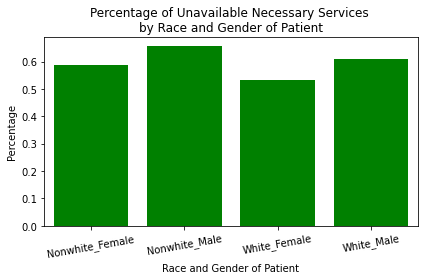

In [18]:
## create a simple bar chart examining percentages of caregivers 
## who report an unavailability of necessary services by race and gender of the patient

unav_nec_serv_bar_ch = create_simple_barch(all_race_gender, 
                                           "Percentage of Unavailable Necessary Services \nby Race and Gender of Patient",
                                           "unavail_serv",
                                           "green",
                                          "../output/unavail-serv-chart-1")

unav_nec_serv_bar_ch
#unav_nec_serv_bar_ch.savefig("../output/unavail-serv-chart-1")



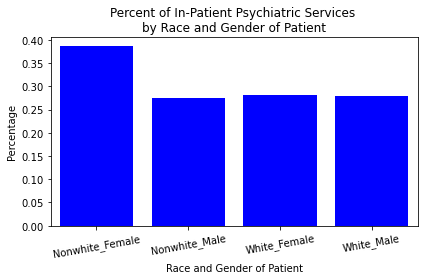

In [19]:
## create a simple bar chart examining percentages of caregivers
## who report the use of in-patient psychiatric crisis care by race and gender of patient

in_pat_cris_chart = create_simple_barch(all_race_gender, 
                                        "Percent of In-Patient Psychiatric Services \nby Race and Gender of Patient",
                                       "was_in-pat_psych_serv_used",
                                       "b",
                                       "../output/in-pat-chart-1")
in_pat_cris_chart

In [20]:
## create dataframe of proportions for overall, white male, nonwhite male, white female, nonwhite female demographics
## based on question of general satisfaction of outpatient mental health services

overall_gen_s_df = likert_df_constr(all_race_gender, "gen_satis_outpatient_mh_serv", "overall")
wm_gen_s_df = likert_df_constr(male_white_df, "gen_satis_outpatient_mh_serv", "white_male")
wf_gen_s_df = likert_df_constr(female_white_df, "gen_satis_outpatient_mh_serv", "white_female")
nwm_gen_s_df = likert_df_constr(male_poc_df, "gen_satis_outpatient_mh_serv", "nonwhite_male")
nwf_gen_s_df = likert_df_constr(female_poc_df, "gen_satis_outpatient_mh_serv", "nonwhite_female")
nwf_gen_s_df



,gen_satis_outpatient_mh_serv,Local ID,percentage,demographic
0,Did not know/answer,7,6.5,nonwhite_female
1,Not satisfied at all,22,20.6,nonwhite_female
2,Somewhat dissatisfied,16,15.0,nonwhite_female
3,Somewhat satisfied,44,41.1,nonwhite_female
4,Very satisfied,18,16.8,nonwhite_female


In [21]:
## concatenate general satisfactions
concat_gen_s_props = pd.concat([overall_gen_s_df, wm_gen_s_df, wf_gen_s_df, nwm_gen_s_df, nwf_gen_s_df])
concat_gen_s_props


,gen_satis_outpatient_mh_serv,Local ID,percentage,demographic
0,Did not know/answer,45,4.2,overall
1,Not satisfied at all,215,20.2,overall
2,Somewhat dissatisfied,190,17.9,overall
3,Somewhat satisfied,389,36.6,overall
4,Very satisfied,224,21.1,overall
0,Did not know/answer,17,3.7,white_male
1,Not satisfied at all,87,18.9,white_male
2,Somewhat dissatisfied,71,15.4,white_male
3,Somewhat satisfied,181,39.3,white_male
4,Very satisfied,105,22.8,white_male


In [22]:
## examine general satisfaction value counts

concat_gen_s_props.gen_satis_outpatient_mh_serv.value_counts()

Did not know/answer      5
Not satisfied at all     5
Somewhat dissatisfied    5
Somewhat satisfied       5
Very satisfied           5
Name: gen_satis_outpatient_mh_serv, dtype: int64

In [23]:
## create dataframes for every response by each demographic

overall_gen_s_df = gen_satis_outp_df_constr(all_race_gender, "overall")
overall_gen_s_df

wm_gen_s_df = gen_satis_outp_df_constr(male_white_df, "white_male")
wm_gen_s_df

wf_gen_s_df = gen_satis_outp_df_constr(female_white_df, "white_female")
wf_gen_s_df

nwm_gen_s_df = gen_satis_outp_df_constr(male_poc_df, "nonwhite_male")
nwm_gen_s_df

nwf_gen_s_df = gen_satis_outp_df_constr(female_poc_df, "nonwhite_female")
nwf_gen_s_df



,gen_satis_outpatient_mh_serv,Local ID,percentage,demographic
0,Did not know/answer,7,6.5,nonwhite_female
1,Not satisfied at all,22,20.6,nonwhite_female
2,Somewhat dissatisfied,16,15.0,nonwhite_female
3,Somewhat satisfied,44,41.1,nonwhite_female
4,Very satisfied,18,16.8,nonwhite_female


In [24]:
## subset by satisfaction ratings

tot_did_n_kn_df = concat_gen_s_props[concat_gen_s_props["gen_satis_outpatient_mh_serv"] == "Did not know/answer"].copy()
tot_did_n_kn_df

tot_not_sat_df = concat_gen_s_props[concat_gen_s_props["gen_satis_outpatient_mh_serv"] == "Not satisfied at all"].copy()
tot_not_sat_df

tot_som_dis_df = concat_gen_s_props[concat_gen_s_props["gen_satis_outpatient_mh_serv"] == "Somewhat dissatisfied"].copy()
tot_som_dis_df

tot_som_sat_df = concat_gen_s_props[concat_gen_s_props["gen_satis_outpatient_mh_serv"] == "Somewhat satisfied"].copy()
tot_som_sat_df

tot_ver_sat_df = concat_gen_s_props[concat_gen_s_props["gen_satis_outpatient_mh_serv"] == "Very satisfied"].copy()
tot_ver_sat_df

lik_list_gs_mh_df = [tot_ver_sat_df, tot_som_sat_df, tot_som_dis_df, tot_not_sat_df, tot_did_n_kn_df]


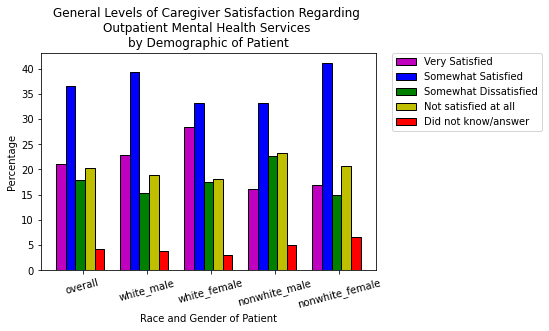

<Figure size 432x288 with 0 Axes>

In [25]:
# bar graph for gen_satisfaction

# code adapted from https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

num_grps = 5
rang = np.arange(num_grps)
width = 0.15

plt.bar(rang - width*2, tot_ver_sat_df["percentage"], color = 'm',
        width = width, edgecolor = 'black',
        label='Very Satisfied')


plt.bar(rang - width, tot_som_sat_df["percentage"], color = 'b',
        width = width, edgecolor = 'black',
        label='Somewhat Satisfied')

plt.bar(rang, tot_som_dis_df["percentage"], color = 'g',
        width = width, edgecolor = 'black',
        label='Somewhat Dissatisfied')

plt.bar(rang + width, tot_not_sat_df["percentage"], color = 'y',
        width = width, edgecolor = 'black',
        label='Not satisfied at all')

plt.bar(rang + width*2, tot_did_n_kn_df["percentage"], color = 'r',
        width = width, edgecolor = 'black',
        label='Did not know/answer')

plt.xlabel("Race and Gender of Patient")
plt.ylabel("Percentage")
plt.title("General Levels of Caregiver Satisfaction Regarding \nOutpatient Mental Health Services \nby Demographic of Patient")
  
# plt.grid(linestyle='--')
plt.xticks(rang + width/4, tot_ver_sat_df["demographic"], rotation=15)
#plt.legend()
# code from https://www.statology.org/matplotlib-legend-position/
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.figure(figsize=(6, 4))
plt.tight_layout()

plt.savefig("../output/tot-gen-s-chart")
plt.show()

In [26]:
## create and concatenate the dataframes for every demographic of patients relating to how much non-hospital crisis care
## options they had 

overall_non_hosp_df = likert_df_constr(all_race_gender, "non_hosp_cris_care_opts", "overall")
wm_non_hosp_df = likert_df_constr(male_white_df, "non_hosp_cris_care_opts", "white_male")
wf_non_hosp_df = likert_df_constr(female_white_df, "non_hosp_cris_care_opts", "white_female")
nwm_non_hosp_df = likert_df_constr(male_poc_df, "non_hosp_cris_care_opts", "nonwhite_male")
nwf_non_hosp_df = likert_df_constr(female_poc_df, "non_hosp_cris_care_opts", "nonwhite_female")

concat_non_hosp_prop = pd.concat([overall_non_hosp_df, wm_non_hosp_df, wf_non_hosp_df, nwm_non_hosp_df, nwf_non_hosp_df])
concat_non_hosp_prop




,non_hosp_cris_care_opts,Local ID,percentage,demographic
0,All that was wanted/needed,118,10.9,overall
1,Did not know/answer,151,14.0,overall
2,None at all,473,43.8,overall
3,"Some, but not as much as was needed/wanted",141,13.1,overall
4,Very little,196,18.2,overall
0,All that was wanted/needed,50,10.8,white_male
1,Did not know/answer,73,15.8,white_male
2,None at all,186,40.3,white_male
3,"Some, but not as much as was needed/wanted",60,13.0,white_male
4,Very little,93,20.1,white_male


In [27]:
## subset concatenated dataframe based on answer to question

all_non_hosp = concat_non_hosp_prop[concat_non_hosp_prop["non_hosp_cris_care_opts"] == "All that was wanted/needed"].copy()
all_non_hosp

some_non_hosp = concat_non_hosp_prop[concat_non_hosp_prop["non_hosp_cris_care_opts"] == "Some, but not as much as was needed/wanted"].copy()
some_non_hosp

very_lit_non_hosp = concat_non_hosp_prop[concat_non_hosp_prop["non_hosp_cris_care_opts"] == "Very little"].copy()
very_lit_non_hosp

no_non_hosp = concat_non_hosp_prop[concat_non_hosp_prop["non_hosp_cris_care_opts"] == "None at all"].copy()
no_non_hosp

not_know_non_hosp = concat_non_hosp_prop[concat_non_hosp_prop["non_hosp_cris_care_opts"] == "Did not know/answer"].copy()
not_know_non_hosp




,non_hosp_cris_care_opts,Local ID,percentage,demographic
1,Did not know/answer,151,14.0,overall
1,Did not know/answer,73,15.8,white_male
1,Did not know/answer,25,14.0,white_female
1,Did not know/answer,44,13.5,nonwhite_male
1,Did not know/answer,9,8.0,nonwhite_female


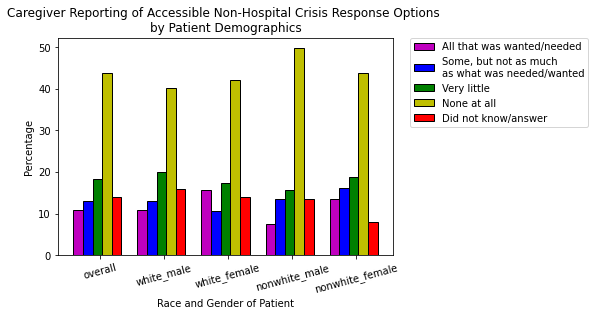

<Figure size 432x288 with 0 Axes>

In [28]:
## create a dodged bar chart for non-hospital crisis care responses

# code adapted from https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

num_grps = 5
rang = np.arange(num_grps)
width = 0.15

plt.bar(rang - width*2, all_non_hosp["percentage"], color = 'm',
        width = width, edgecolor = 'black',
        label="All that was wanted/needed")


plt.bar(rang - width, some_non_hosp["percentage"], color = 'b',
        width = width, edgecolor = 'black',
        label='Some, but not as much \nas what was needed/wanted')

plt.bar(rang, very_lit_non_hosp["percentage"], color = 'g',
        width = width, edgecolor = 'black',
        label='Very little')

plt.bar(rang + width, no_non_hosp["percentage"], color = 'y',
        width = width, edgecolor = 'black',
        label='None at all')

plt.bar(rang + width*2, not_know_non_hosp["percentage"], color = 'r',
        width = width, edgecolor = 'black',
        label='Did not know/answer')

plt.xlabel("Race and Gender of Patient")
plt.ylabel("Percentage")
plt.title("Caregiver Reporting of Accessible Non-Hospital Crisis Response Options \nby Patient Demographics")
  
# plt.grid(linestyle='--')
plt.xticks(rang + width/4, tot_ver_sat_df["demographic"], rotation=15)
#plt.legend()
# code from https://www.statology.org/matplotlib-legend-position/
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.figure(figsize=(6, 4))
plt.tight_layout()

plt.savefig("../output/non-hosp-chart")
plt.show()

In [29]:
overall_acc_mh_serv_df = likert_df_constr(all_race_gender, "access_of_mh_services", "overall")
wm_acc_mh_serv_df = likert_df_constr(male_white_df, "access_of_mh_services", "white_male")
wf_acc_mh_serv_df = likert_df_constr(female_white_df, "access_of_mh_services", "white_female")
nwm_acc_mh_serv_df = likert_df_constr(male_poc_df, "access_of_mh_services", "nonwhite_male")
nwf_acc_mh_serv_df = likert_df_constr(female_poc_df, "access_of_mh_services", "nonwhite_female")

concat_acc_mh_serv_prop = pd.concat([overall_acc_mh_serv_df, wm_acc_mh_serv_df, wf_acc_mh_serv_df, nwm_acc_mh_serv_df, nwf_acc_mh_serv_df])
concat_acc_mh_serv_prop.access_of_mh_services.value_counts()

Could not access                5
Did not know/answer             5
Difficult to access             5
Easy to access                  5
Somewhat difficult to access    5
Somewhat easy to access         5
Name: access_of_mh_services, dtype: int64

In [30]:

#all_race_gender["are_non_hosp_opts"] = all_race_gender["non_hosp_cris_care_opts"] == "Yes"
all_race_gender["non_hosp_cris_care_opts"].value_counts()
all_race_gender["access_of_mh_services"].value_counts()
all_race_gender["wknd_avail_cris"].value_counts()


None at all                                   437
Very little                                   204
Some, but not as much as was needed/wanted    189
All that was wanted/needed                    156
Did not know/answer                            81
Name: wknd_avail_cris, dtype: int64

In [31]:
easy_acc_mh_serv = concat_acc_mh_serv_prop[concat_acc_mh_serv_prop["access_of_mh_services"] == "Easy to access"].copy()
easy_acc_mh_serv

some_eas_acc_mh = concat_acc_mh_serv_prop[concat_acc_mh_serv_prop["access_of_mh_services"] == "Somewhat easy to access"].copy()
#some_eas_acc_mh

some_diff_acc_mh = concat_acc_mh_serv_prop[concat_acc_mh_serv_prop["access_of_mh_services"] == "Somewhat difficult to access"].copy()
#some_diff_acc_mh

diff_acc_mh = concat_acc_mh_serv_prop[concat_acc_mh_serv_prop["access_of_mh_services"] == "Difficult to access"].copy()

not_acc_mh = concat_acc_mh_serv_prop[concat_acc_mh_serv_prop["access_of_mh_services"] == "Could not access"].copy()

not_know_answ_acc_mh = concat_acc_mh_serv_prop[concat_acc_mh_serv_prop["access_of_mh_services"] == "Did not know/answer"].copy()

acc_mh_dfs = [easy_acc_mh_serv, some_eas_acc_mh, some_diff_acc_mh, diff_acc_mh, not_acc_mh, not_know_answ_acc_mh]

<class 'numpy.ndarray'>
6


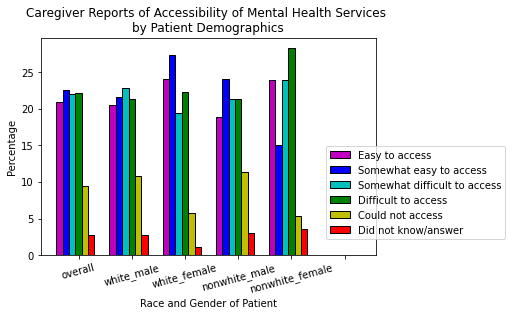

<Figure size 432x288 with 0 Axes>

In [32]:
# code adapted from https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

#num_grps = 
rang = np.arange(len(acc_mh_dfs))
print(type(np.arange(len(acc_mh_dfs))))
width = 0.12
#rang - width*3

list_eas_acc = list(easy_acc_mh_serv["percentage"])
list_eas_acc.append(0)
print(len(list_eas_acc))

plt.bar(rang - width*3, list_eas_acc, color = 'm',
        width=width, edgecolor = 'black',
        label="Easy to access")

list_som_eas_acc = list(some_eas_acc_mh["percentage"])
list_som_eas_acc.append(0)

plt.bar(rang - width*2, list_som_eas_acc, color = 'b',
        width = width, edgecolor = 'black',
        label='Somewhat easy to access')

list_some_diff_acc = list(some_diff_acc_mh["percentage"])
list_some_diff_acc.append(0)

plt.bar(rang - width, list_some_diff_acc, color = 'c',
        width = width, edgecolor = 'black',
        label='Somewhat difficult to access')

list_diff_acc = list(diff_acc_mh["percentage"])
list_diff_acc.append(0)

plt.bar(rang, list_diff_acc, color = 'g',
        width = width, edgecolor = 'black',
        label='Difficult to access')

list_not_acc = list(not_acc_mh["percentage"])
list_not_acc.append(0)

plt.bar(rang + width, list_not_acc, color = 'y',
        width = width, edgecolor = 'black',
        label='Could not access')

list_not_know = list(not_know_answ_acc_mh["percentage"])
list_not_know.append(0)

plt.bar(rang + width*2, list_not_know, color = 'r',
        width = width, edgecolor = 'black',
        label='Did not know/answer')

plt.xlabel("Race and Gender of Patient")
plt.ylabel("Percentage")
plt.title("Caregiver Reports of Accessibility of Mental Health Services \nby Patient Demographics")
  
#plt.grid(linestyle='--')

list_demogr = list(tot_ver_sat_df["demographic"])
list_demogr.append("")

plt.xticks(rang, list_demogr, rotation=15)
plt.legend()
# code from https://www.statology.org/matplotlib-legend-position/
plt.legend(bbox_to_anchor=(0.85, 0.5), loc='upper left', borderaxespad=0)
plt.figure(figsize=(6, 4))
plt.tight_layout()

plt.savefig("../output/eas-acc-mh-chart")
plt.show()

In [33]:
concat_acc_mh_serv_prop

,access_of_mh_services,Local ID,percentage,demographic
0,Could not access,103,9.5,overall
1,Did not know/answer,29,2.7,overall
2,Difficult to access,240,22.2,overall
3,Easy to access,226,20.9,overall
4,Somewhat difficult to access,237,22.0,overall
5,Somewhat easy to access,244,22.6,overall
0,Could not access,50,10.8,white_male
1,Did not know/answer,13,2.8,white_male
2,Difficult to access,99,21.4,white_male
3,Easy to access,95,20.5,white_male


### Considerations of caregiver relationships to patients

In [34]:
## investigate dartmouth data set
Dartmouth_Data_df.head()


,Local ID,Region,County,Start Coordinator,Date Enrolled in START,Status,Status Date,Time Enrolled in START,Source of referral to START,Suitability of enrollment in START,...,State sponsored ICF/DD stay in past 1 - 5 years (at enrollment to START),Jailed in the past year (at enrollment to START),Jailed in the past 1 - 5 years (at enrollment to START),Employment Status at Enrollment,Grade In School,Current IEP,Current 504 Plan,School Setting,Custody Status,Child Lives With
0,8085297,California : CA START East Bay,Contra Costa,Mary Akhuetie,2020-12-30,Active,2020-12-30,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,...,No,No,No,Student,Grade 7,Yes: 2020-11-16,No,Special school-out of district,Parental custody,Parents
1,440987,New York : Region 3,Saratoga,Natalia Wolosen,2020-12-29,Inactive (stable functioning),2021-08-09,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,...,No,No,No,Student,Grade 11,No,No,Other: BOCES 4:1:2,Parental custody,Parents
2,8008815,California : CA START East Bay,Alameda,Sharon Cyrus-Savary,2020-12-29,Inactive (no longer requesting services),2021-06-27,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,...,No,No,No,Student,Grade 8,Yes: 2020-01-01,No,Special school-in district,Parental custody,Parents
3,220396,New York : Region 3,Albany,Matthew Wolcott,2020-12-29,Inactive (inappropriate for services),2021-06-11,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,...,No,No,No,Not employed,NaN,NaN,NaN,NaN,NaN,NaN
4,6570649,California : CA START San Andreas,Santa Cruz,Ilian Navarro,2020-12-29,Active,2020-12-29,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,...,No,No,No,NaN,NaN,NaN,NaN,Other: COE Program Held at Cabrillo College,NaN,NaN


In [35]:
## look at list of column names
Dartmouth_Data_df.columns

Index(['Local ID', 'Region', 'County', 'Start Coordinator',
       'Date Enrolled in START', 'Status', 'Status Date',
       'Time Enrolled in START', 'Source of referral to START',
       'Suitability of enrollment in START',
       'Individual/Caregiver reliable access to technology',
       'Presenting problems at time of enrollment', 'Services at Enrollment',
       'Date of birth', 'Gender', 'Race', 'Ethnicity',
       'Level of Intellectual Disability',
       'Current living situation at enrollment to START',
       'More than one living situation over the last 5 years?',
       'More than one living situation over the last year?',
       'Psychiatric hospitalization in past year (at enrollment to START)',
       'Psychiatric hospitalizations in past 1 - 5 years (at enrollment to START)',
       'Emergency department visits in past year (at enrollment to START)',
       'Emergency department visits in past 1-5 years (at enrollment to START)',
       'Law enforcement encounters i

In [36]:
##rename columns for simplicity and look at value counts of responses for primary caregiver relationship to patient

ren_cols(Dartmouth_Data_df, "Who is the individual's primary caregiver?", "prim_careg_rel")

ren_cols(Dartmouth_Data_df, "Law enforcement encounters in past year (at enrollment to START)", "law_enc_one_yr")
ren_cols(Dartmouth_Data_df, "Law enforcement encounters in past 1 - 5 years (at enrollment to START)", "law_enc_one_fiv_yr")


Dartmouth_Data_df.prim_careg_rel.value_counts()


Parent                       2707
Paid support staff           1292
Self                          285
Other family member           237
Guardian                      215
Authorized representative     121
Name: prim_careg_rel, dtype: int64

In [37]:
## create dataframe of just the columns we want

care_giv_law = Dartmouth_Data_df[["Local ID", "prim_careg_rel", "law_enc_one_yr", "law_enc_one_fiv_yr"]].copy()

care_giv_law.head()




,Local ID,prim_careg_rel,law_enc_one_yr,law_enc_one_fiv_yr
0,8085297,Parent,NaN,NaN
1,440987,Parent,NaN,NaN
2,8008815,Parent,NaN,NaN
3,220396,Paid support staff,NaN,NaN
4,6570649,Parent,NaN,NaN


In [38]:

## do a left merge and see value counts of results

all_rac_gend_law = pd.merge(all_race_gender, care_giv_law, how="left", on="Local ID")

all_rac_gend_law.head()

all_rac_gend_law.prim_careg_rel.value_counts()

Parent                       48
Guardian                     10
Other family member           5
Paid support staff            3
Authorized representative     1
Name: prim_careg_rel, dtype: int64